In [1]:
pip install yfinance

In [2]:
import yfinance as yf

In [3]:
#Reading in BTC prices
df = yf.download('BTC-USD')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

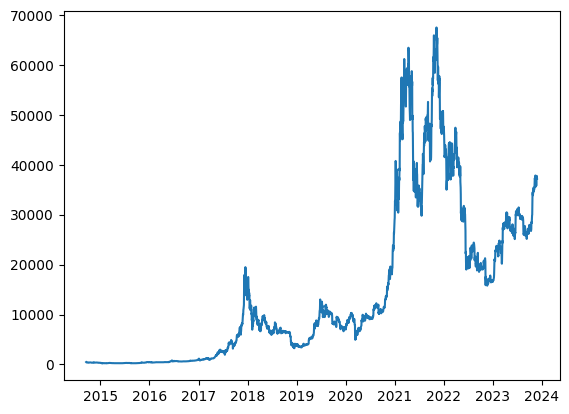

In [5]:
plt.plot(df.index, df['Adj Close'])
plt.show()

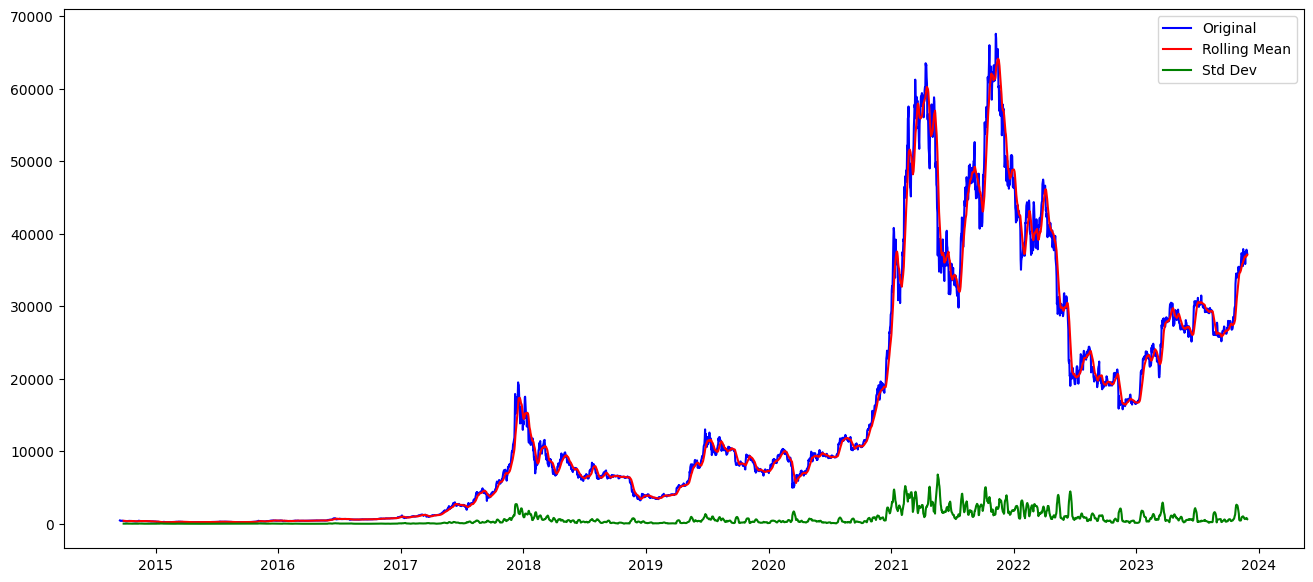

In [17]:
#Plot 12 day rolling mean as well as 12 day std dev
df.head()
rollmean = df['Adj Close'].rolling(12).mean()
rollstd = df['Adj Close'].rolling(12).std()

plt.figure(figsize=(16,7))
orig = plt.plot(df['Adj Close'], color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'green', label = 'Std Dev')
plt.legend(loc = 'best')

In [6]:
#Train test split
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

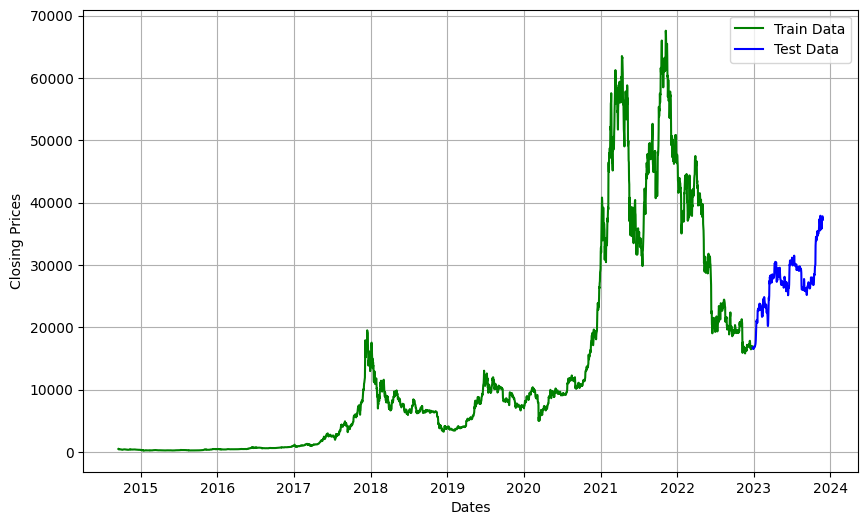

In [7]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label = 'Train Data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label = 'Test Data')
plt.legend()

In [8]:
model_predictions = []
n_test_obser = len(testing_data)

In [9]:
#Fit ARIMA model
model = ARIMA(training_data, order=(4, 1, 1))
model_fit = model.fit()



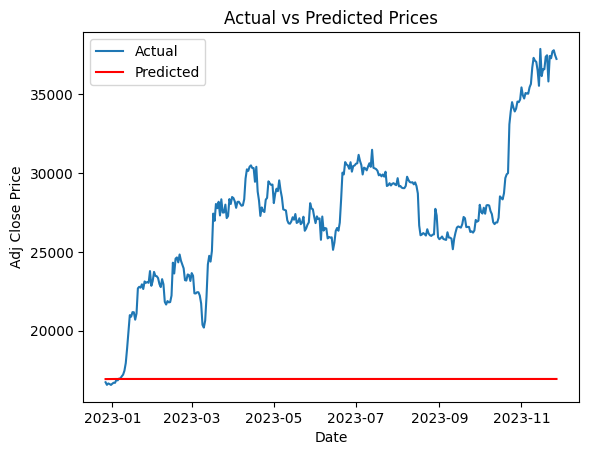

In [10]:
"""
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  print(output)
"""

# Number of test observations
n_test_obs = len(testing_data)

testing_data = pd.Series(testing_data, index=df[to_row:].index)

model_predictions = model_fit.forecast(steps=n_test_obs)

# Plot the actual values
plt.plot(testing_data.index, testing_data.values, label='Actual')

# Plot the predicted values
plt.plot(testing_data.index, model_predictions, label='Predicted', color='red')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Show the plot
plt.show()